In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

2024-01-26 20:28:28.958002: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-26 20:28:29.552550: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-26 20:28:29.556108: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-26 20:28:33.306058: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


## Exploratory Data Analysis & Text Preprocessing

### Load the Data:

In [3]:
data = pd.read_csv('data.csv')

### Understand the Data:

In [4]:
# Display the first few rows of the dataset
data.head(10)


,text,class
0,طبيعى جدا ان يحب الزمالكاوية حسام قليل الادب و...,egypt
1,زي الكلاب اللى ممكن تاكل سمك ويجلها جرب,egypt
2,بصح ما شاء الله,morocco
3,بسع مني أداك الكداب,morocco
4,اوعاك تقول:,egypt
5,لا قالو لي حطي لوحة ديل لخشب حطي فوقها جوجو كش...,morocco
6,عجبنى التعليق رقم 5///ورقم 16 هى دى الاراء ولا...,egypt
7,بنمهيدي إختصاصي الأعصاب,morocco
8,براوة عليك كلماتك رائعة .,egypt
9,هاد الحوايج تاع إدارة ما علاباليش كيفاش يمشو ...,algeria


In [5]:
# Get information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15001 entries, 0 to 15000
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    15001 non-null  object
 1   class   15001 non-null  object
dtypes: object(2)
memory usage: 234.5+ KB


In [6]:
# Descriptive statistics
data.describe()

,text,class
count,15001,15001
unique,14961,4
top,ماشي مشكل,algeria
freq,2,5858


### Distribution of Classes:


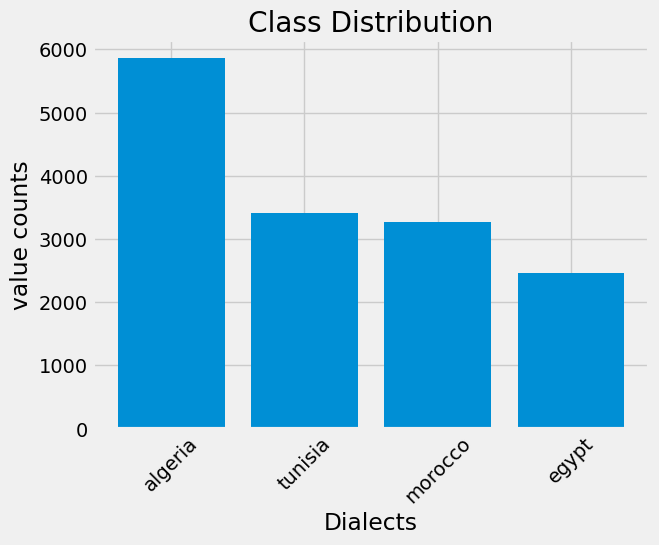

In [7]:
# Count the occurrences of each class
class_counts = data['class'].value_counts()
cc = class_counts.to_dict()
Dialects = list(cc.keys())
counts = list(cc.values())

# Plot the distribution
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

plt.bar(Dialects,counts)
plt.xlabel("Dialects")
plt.xticks(rotation=45)
plt.ylabel("value counts")
plt.title("Class Distribution")
plt.show()

In [8]:
df = data[data['class'] == 'algeria']
drop_indices = np.random.choice(df.index, 2500, replace=False)
data_subset = data.drop(drop_indices)

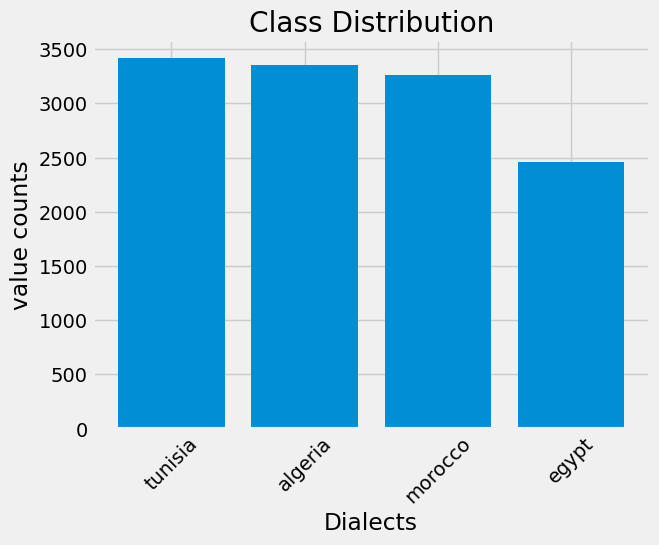

In [9]:
# Count the occurrences of each class
class_counts = data_subset['class'].value_counts()
cc = class_counts.to_dict()
Dialects = list(cc.keys())
counts = list(cc.values())

plt.bar(Dialects,counts)
plt.xlabel("Dialects")
plt.xticks(rotation=45)
plt.ylabel("value counts")
plt.title("Class Distribution")
plt.show()

### Text Length Analysis:

<Axes: title={'center': 'Text Length Distribution'}, ylabel='Frequency'>

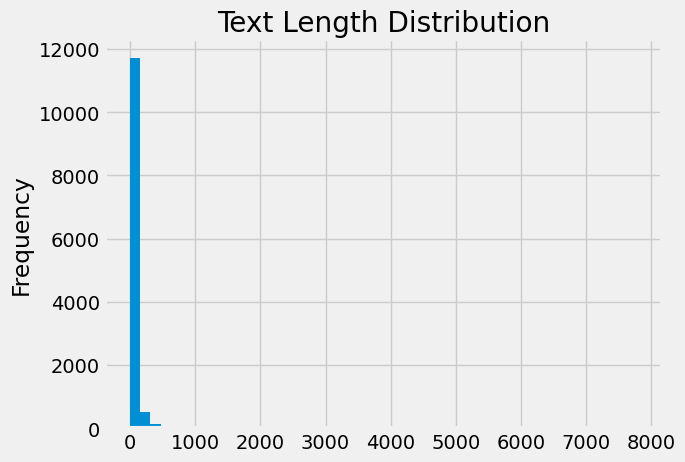

In [10]:
# Calculate text lengths and plot a histogram
data_subset['text_length'] = data_subset['text'].apply(len)
data_subset['text_length'].plot(kind='hist', bins=50, title='Text Length Distribution')


#### some cleaning

[1495, 549, 284, 168, 112, 71, 52, 36, 27, 18]


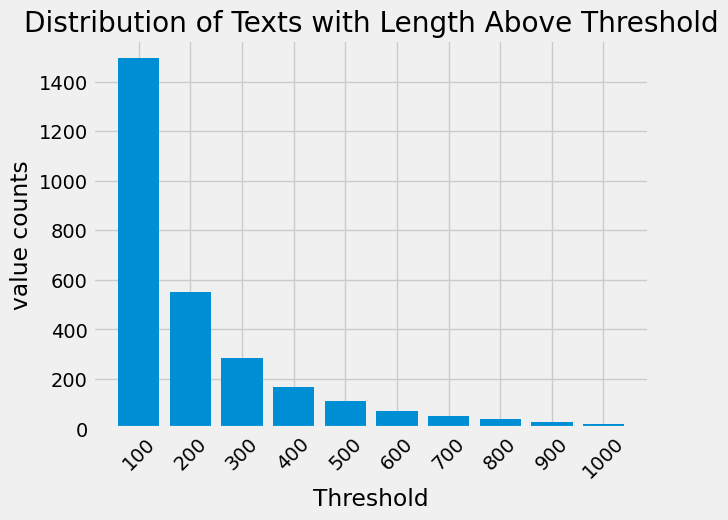

In [11]:
l = []
for i in range(100,1100,100):
    big_t = data_subset[data_subset.text_length>i]
    l.append(len(big_t.index))
print(l)
plt.bar([ f"{i}" for i in range(100,1100,100)],l)
plt.xlabel("Threshold")
plt.xticks(rotation=45)
plt.ylabel("value counts")
plt.title("Distribution of Texts with Length Above Threshold")
plt.show()

<Axes: title={'center': 'Text Length Distribution'}, ylabel='Frequency'>

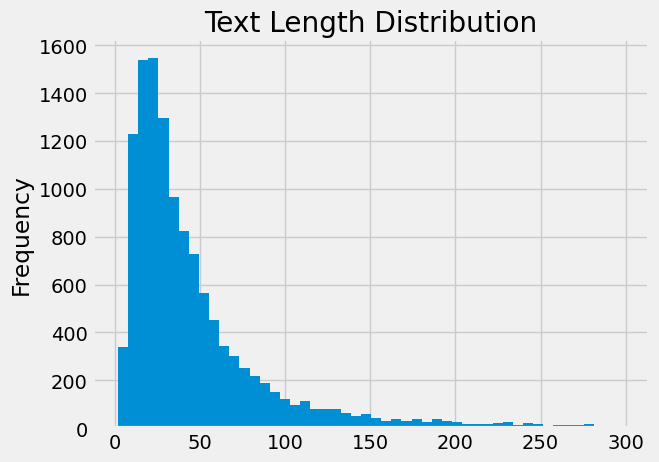

In [12]:
data_subset = data_subset[data_subset.text_length<300]
data_subset['text_length'] = data_subset['text'].apply(len)
data_subset['text_length'].plot(kind='hist', bins=50, title='Text Length Distribution')

### Word Frequency Analysis:

### removing stop words

In [13]:
def clean(x):
    list = x.split(' ')
    list = [ i for i in list if len(i) >= 2]
    return ' '.join(list)

data_subset["clean_text"] = data_subset['text'].apply(clean)


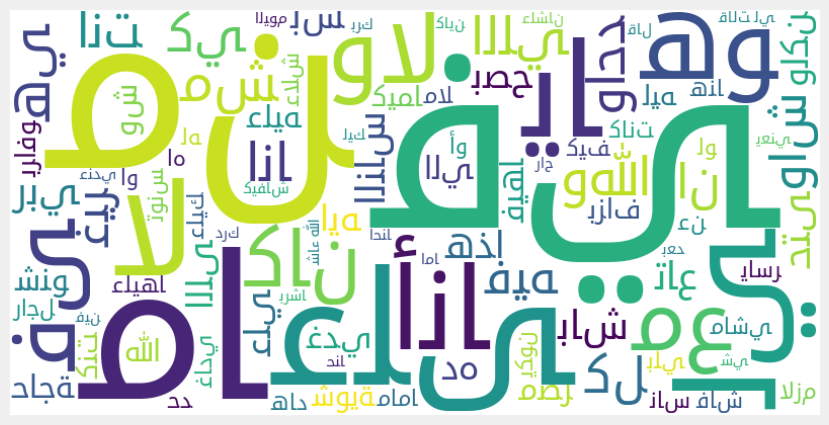

In [14]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import arabic_reshaper
# Combine all text into a single string
all_text = " ".join(arabic_reshaper.reshape(t) for t in data_subset.clean_text)

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white',font_path='/usr/share/fonts/droid/DroidSansArabic.ttf').generate(all_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


### Class Relationships:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


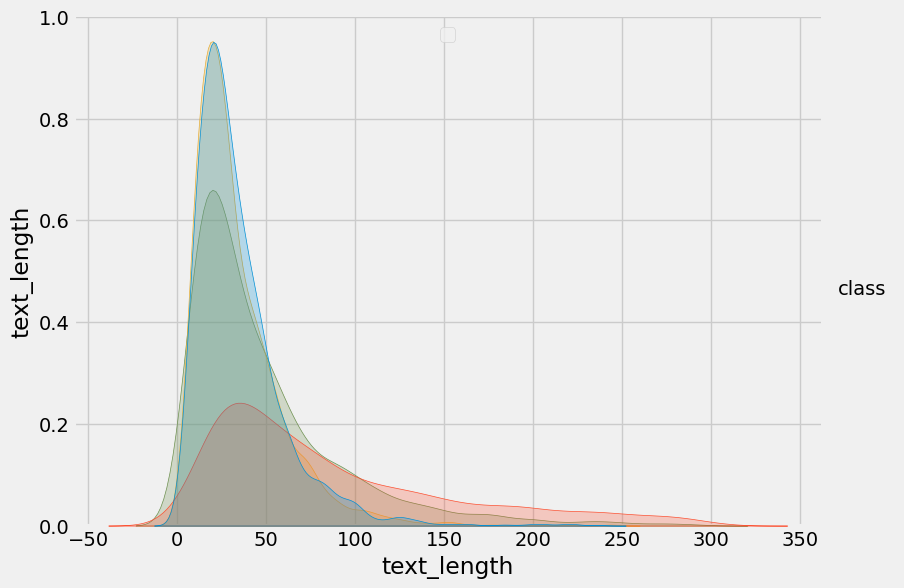

In [15]:
import seaborn as sns

# Explore relationships between features

data_subset['class'] = data_subset['class'].astype('category')
sns.pairplot(data_subset, hue='class',height=6, aspect=11.7/8.27)
plt.legend(loc='upper center')

#### the modes of each class are closed to each other

### Identify Outliers

<Axes: xlabel='class', ylabel='text_length'>

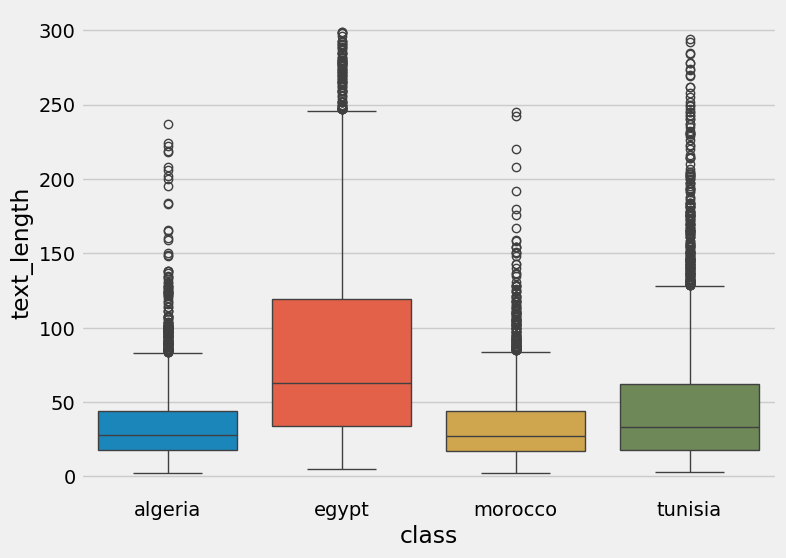

In [16]:
# Box plot to identify outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x='class', y='text_length', data=data_subset,hue='class')

## Split the Data:



In [17]:
dd = pd.get_dummies(data_subset,columns=["class"])

In [18]:
lb = LabelEncoder()

data_subset['class_encoded'] = lb.fit_transform(data_subset['class'])


In [19]:
lb.classes_

array(['algeria', 'egypt', 'morocco', 'tunisia'], dtype=object)

In [20]:
X = data_subset.clean_text
y = data_subset.class_encoded

X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state=42)

### Tokenize

In [21]:
x = ' '.join(X)
x = x.split(' ')
x = len(set(x))
print(f"Number of unique words : {x}")

Number of unique words : 31349


In [22]:
vocab_size = 30000
max_length = 300
embedding_dim = 16
# trunc_type='post'
oov_tok = "<OOV>"

In [23]:
tokenizer = Tokenizer(num_words = vocab_size,oov_token=oov_tok)

tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index

sequences = tokenizer.texts_to_sequences(X_train)
padded = pad_sequences(sequences,maxlen=max_length,truncating='post')

testing_sequences = tokenizer.texts_to_sequences(X_test)
testing_padded = pad_sequences(testing_sequences,maxlen=max_length, truncating='post')

In [24]:
padded.dtype

dtype('int32')

In [25]:

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(4)
])

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),optimizer='adam',metrics=['accuracy'])

model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 300, 16)           480000    
                                                                 
 flatten (Flatten)           (None, 4800)              0         
                                                                 
 dense (Dense)               (None, 100)               480100    
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                6464      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                2

In [26]:
num_epochs = 5

# Train the model
history = model.fit(padded,y_train, epochs=num_epochs, validation_data=(testing_padded, y_test))

Epoch 1/5
306/306 [==============================] - 11s 29ms/step - loss: 1.3491 - accuracy: 0.2951 - val_loss: 1.0935 - val_accuracy: 0.4687
Epoch 2/5
306/306 [==============================] - 9s 28ms/step - loss: 0.8572 - accuracy: 0.5731 - val_loss: 0.6542 - val_accuracy: 0.6885
Epoch 3/5
306/306 [==============================] - 10s 31ms/step - loss: 0.5046 - accuracy: 0.7394 - val_loss: 0.5753 - val_accuracy: 0.7728
Epoch 4/5
306/306 [==============================] - 9s 30ms/step - loss: 0.2683 - accuracy: 0.8919 - val_loss: 0.5017 - val_accuracy: 0.8391
Epoch 5/5
306/306 [==============================] - 9s 30ms/step - loss: 0.1073 - accuracy: 0.9638 - val_loss: 0.5801 - val_accuracy: 0.8539


In [27]:
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend()

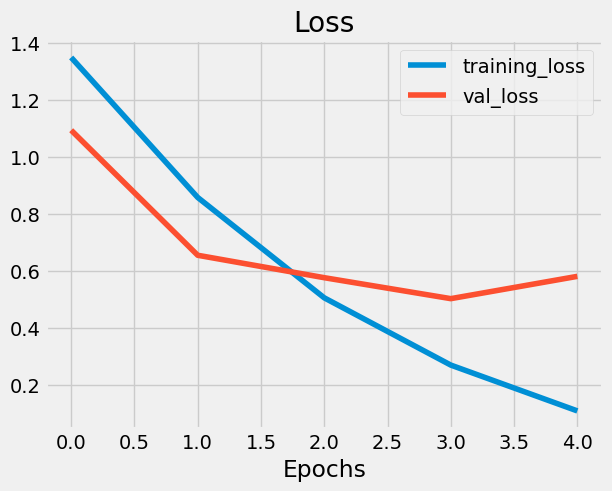

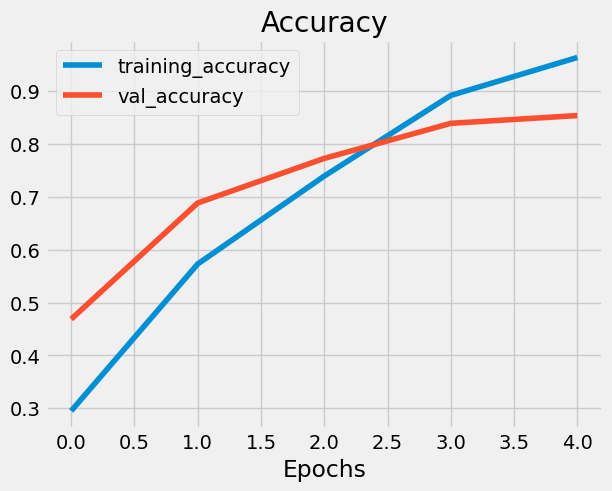

In [28]:
plot_loss_curves(history)

### Saving the model & tokenizer

In [29]:
# import json
# # model.save("north_africa_dialects_classification.h5")
# with open("tokenizer.json", "w") as json_file:
#     json.dump(tokenizer.word_index, json_file)

In [30]:
from tensorflow.keras import models

my_model = models.load_model("north_africa_dialects_classification.h5")

In [31]:
embedding_layer = model.layers[0]

embedding_weights = embedding_layer.get_weights()[0]

print(embedding_weights.shape) 


(30000, 16)


77/77 [==============================] - 0s 4ms/step


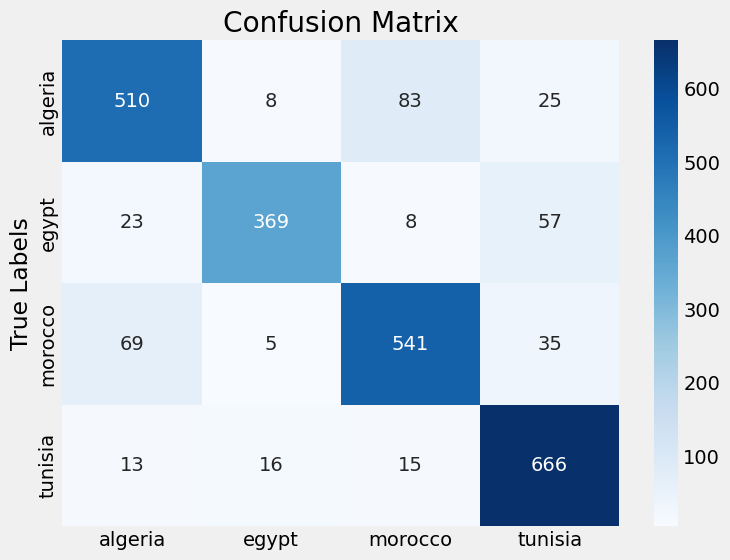

[2 1 3 ... 2 2 2]


In [32]:
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a trained model and a test dataset
# model = your_trained_model
# test_data = your_test_data
# test_labels = your_true_labels

# Make predictions on the test dataset
predictions = model.predict(testing_padded)

# Convert predictions and true labels to numpy arrays
predicted_labels = tf.argmax(predictions, axis=1).numpy()
true_labels = tf.argmax(testing_padded, axis=1).numpy()

# Create a confusion matrix using scikit-learn
cm = confusion_matrix(y_test, predicted_labels)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['algeria', 'egypt', 'morocco', 'tunisia'], yticklabels=['algeria', 'egypt', 'morocco', 'tunisia'])
# plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
print(predicted_labels)

In [33]:
prob_model = models.Sequential([model,tf.keras.layers.Softmax()])

In [34]:
np.argmax(prob_model.predict(testing_padded[13:14]))

1/1 [==============================] - 0s 115ms/step


3

In [35]:
def classify_text(text):
    sequences = tokenizer.texts_to_sequences([text])
    padded_sequences = pad_sequences(sequences, maxlen=300) 
    prediction = prob_model.predict(padded_sequences)[0]
    
    result = {
        'Algeria': prediction[0],
        'Egypt': prediction[1],
        'Morocco': prediction[2],
        'Tunisia': prediction[3],
    }
    
    return result

In [36]:
classify_text("مخيبك وليت يا فريال  مكنتي اقعدا في تونس زي العسل مشيت المصر وليت بصل")

1/1 [==============================] - 0s 54ms/step


{'Algeria': 3.230465e-06,
 'Egypt': 0.00010302181,
 'Morocco': 9.363148e-06,
 'Tunisia': 0.99988437}

In [37]:
import gradio

In [38]:
# Gradio Interface
iface = gradio.Interface(
    fn=classify_text,
    inputs=gradio.Textbox(),
    outputs=gradio.Label(num_top_classes=4),
    live=True,
    title="North africa dialects Classifier",
    description="Enter a text, and the model will classify it."
)

iface.launch(share=True)

Running on local URL:  http://127.0.0.1:7862
Running on public URL: https://47fa6c6236af3f51be.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


In [39]:
iface.close()

Closing server running on port: 7862
